In [1]:
# %pip install pystac_client==0.4
# %pip install plotly

In [2]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm


In [3]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    # r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

<Client id=gca-catalog>

In [4]:
list(catalog.get_collections())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>]

In [5]:
collection=catalog.get_child("Haz-GCM_90-100")
collection

<CollectionClient id=Haz-GCM_90-100>

In [6]:
href = collection.assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

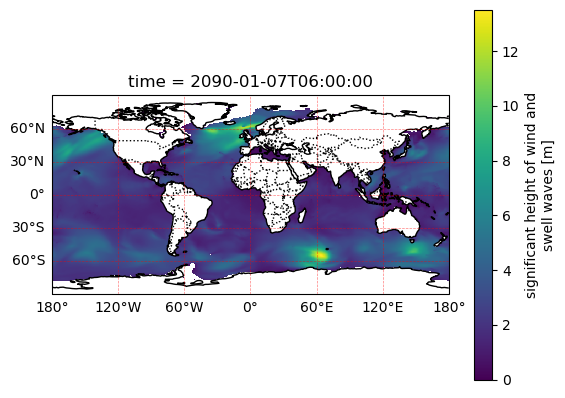

In [7]:


# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=50)["hs_1_26"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

In [8]:
#Change longitude coordinate
def longitude_coverter(lon):
    if lon <0:
        lon=lon+360
    else:
        lon=lon
    return lon

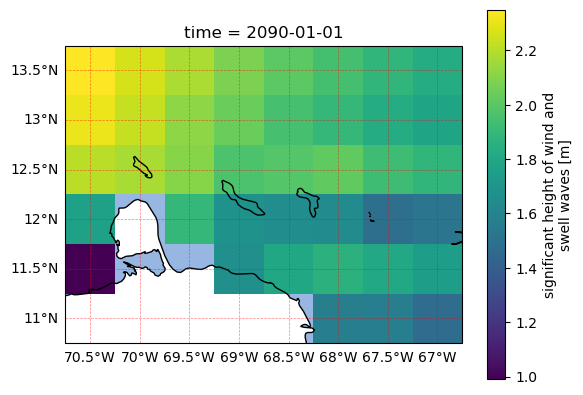

In [9]:

lon_min=-66.985558489
lon_max=-70.897144235

var="hs_1_26"
time_step=0
lat_min=10.641308809
lat_max=13.734711864


# #Change longitude coordinate
# def longitude_coverter(lon_min, lon_max)
#     lon_span=[lon_min,lon_max]

#     for i,lon in enumerate(lon_span):
#         if lon <0:
#             lon_span[i]=lon+360
#         else:
#             lon_span[i]=lon
#     return lon_span

# #Change longitude coordinate
# def longitude_coverter(lon):
#         if lon <0:
#             lon=lon+360
#         else:
#             lon=lon
#         return lon

lon_span=[longitude_coverter(lon_min),longitude_coverter(lon_max)]





# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=time_step).sel(longitude=slice(np.min(lon_span),np.max(lon_span)),latitude=slice(lat_min,lat_max))[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

create a scatterplot

In [10]:
#Import the dataframe with points of interest

df2=pd.read_csv(r"F:\Deltares laptop\Arjen_Vector_Template_Netherland_Antilles.csv")
df2.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [11]:
longitude_coverter(df2["Intersect_lon"].iloc[0])

291.5989672035

In [12]:
#Filter each each ds for each df
ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[0],longitude=longitude_coverter(df2["Intersect_lon"].iloc[0]),method="nearest")
ds_filtered


<xarray.Dataset>
Dimensions:    (time: 32136)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    hs_5_85    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [13]:

f=ds_filtered.isel(time=0)[var].values
f


array(1.9840001, dtype=float32)

In [14]:
# Rechunk the dataset to ensure the 'time' dimension is in a single chunk
ds_filtered_unchunked = ds_filtered.chunk(dict(time=-1))
ds_filtered_unchunked 


<xarray.Dataset>
Dimensions:    (time: 32136)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time) float32 dask.array<chunksize=(32136,), meta=np.ndarray>
    hs_5_85    (time) float32 dask.array<chunksize=(32136,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [15]:
q=ds_filtered_unchunked#.isel(time=slice(0,10))
q

<xarray.Dataset>
Dimensions:    (time: 32136)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time) float32 dask.array<chunksize=(32136,), meta=np.ndarray>
    hs_5_85    (time) float32 dask.array<chunksize=(32136,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [16]:


# Now apply the quantile operation to the rechunked dataset
p = q.quantile(0.95, dim='time')
p

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    quantile  float64 0.95
Data variables:
    hs_1_26   float64 dask.array<chunksize=(), meta=np.ndarray>
    hs_5_85   float64 dask.array<chunksize=(), meta=np.ndarray>

In [17]:
# from dask.diagnostics import ProgressBar

# with ProgressBar():
#     x=p.compute()

In [18]:
# x

In [19]:
df2["Lat_ERA5"]=0
df2["Lon_ERA5"]=0
df2["Lat_ERA5"]=df2["Lat_ERA5"].astype('float32')
df2["Lon_ERA5"]=df2["Lon_ERA5"].astype('float32')
df2

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,0.0,0.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,0.0,0.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,0.0,0.0


In [20]:
#Filter each each ds for all points
ds_list=[]
for i in tqdm(df2.index,desc="appending ds_list"):
    ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[i],longitude=longitude_coverter(df2["Intersect_lon"].iloc[i]),method="nearest")
    df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
    df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]

df2

appending ds_list:   0%|          | 0/623 [00:00<?, ?it/s]C:\Users\cro005\AppData\Local\Temp\ipykernel_12412\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
C:\Users\cro005\AppData\Local\Temp\ipykernel_12412\21376807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]
appending ds_list:   0%|          | 1/623 [00:00<02:13,  4.66it/s]C:\Users\cro005\AppData\Local\Temp\ipykernel_12412\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [21]:
df=df2
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [22]:
df["Lat_Lon"]=list(zip(df2["Lat_ERA5"],df2["Lon_ERA5"]))
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [23]:
#Find the unique values to prevent recalculations

unique_points=df["Lat_Lon"].unique()
unique_points

array([(12.5, 291.5), (12.0, 291.0), (12.5, 291.0), (12.0, 292.0),
       (12.5, 290.0), (12.0, 291.5)], dtype=object)

In [24]:
x=12.5
y=291.5
ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
quan=ds_unchunk.quantile(0.95, dim='time')
quan

<xarray.DataArray 'hs_1_26' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    quantile  float64 0.95

In [25]:
from dask.diagnostics import ProgressBar

perc_95=[]
vars=["hs_1_26","hs_5_85"]
for j,var in enumerate(vars):
    for x,y in tqdm(unique_points,desc="calculating percentile"):
        ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
        quan=ds_unchunk.quantile(0.95, dim='time')
        perc_95.append(quan)
    perc_95

    
    unique_hs=[]
    for i,hs in tqdm(enumerate(perc_95)):
        with ProgressBar():
            unique_hs.append(hs.compute())

    
    if j==0:
        unique_hs_1_26_values= [da.values for da in unique_hs]
    else:
        unique_hs_5_85_values= [da.values for da in unique_hs]

calculating percentile:   0%|          | 0/6 [00:00<?, ?it/s]

calculating percentile: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
0it [00:00, ?it/s]

[########################################] | 100% Completed | 24m 39s


1it [24:42, 1482.00s/it]

[########################################] | 100% Completed | 26m 11s


2it [50:55, 1535.65s/it]

[########################################] | 100% Completed | 31m 0ss


3it [1:21:57, 1684.95s/it]

[########################################] | 100% Completed | 27m 47s


4it [1:49:47, 1678.89s/it]

[########################################] | 100% Completed | 28m 30s


5it [2:18:20, 1691.26s/it]

[########################################] | 100% Completed | 28m 58s


6it [2:47:21, 1673.61s/it]
calculating percentile: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
0it [00:00, ?it/s]

[########################################] | 100% Completed | 28m 40s


1it [28:42, 1722.18s/it]

[########################################] | 100% Completed | 27m 44s


2it [56:28, 1689.61s/it]

[########################################] | 100% Completed | 24m 36s


3it [1:21:08, 1593.53s/it]

[########################################] | 100% Completed | 29m 48s


4it [1:50:59, 1671.58s/it]

[########################################] | 100% Completed | 30m 7ss


5it [2:21:08, 1721.22s/it]

[########################################] | 100% Completed | 27m 8ss


6it [2:48:19, 1690.47s/it]

[########################################] | 100% Completed | 24m 45s


7it [3:13:07, 1624.41s/it]

[########################################] | 100% Completed | 20m 47s


8it [3:33:57, 1505.22s/it]

[########################################] | 100% Completed | 21m 7ss


9it [3:55:07, 1431.70s/it]

[########################################] | 100% Completed | 13m 39s


10it [4:08:50, 1243.56s/it]

[########################################] | 100% Completed | 14m 12s


11it [4:23:04, 1124.54s/it]

[########################################] | 100% Completed | 13m 45s


12it [4:36:52, 1384.40s/it]


In [26]:
unique_df = pd.DataFrame({
  'unique_points': unique_points,
  'unique_hs_1_26': unique_hs_1_26_values,
  'unique_hs_5_85': unique_hs_5_85_values[6:]
})
unique_df


,unique_points,unique_hs_1_26,unique_hs_5_85
0,"(12.5, 291.5)",2.368000030517578,2.4220001697540283
1,"(12.0, 291.0)",1.9820001125335693,2.0420000553131104
2,"(12.5, 291.0)",2.2760000228881836,2.3380000591278076
3,"(12.0, 292.0)",2.070000171661377,2.1105000972747803
4,"(12.5, 290.0)",2.4100000858306885,2.51200008392334
5,"(12.0, 291.5)",2.0340001583099365,2.080000162124634


In [27]:

unique_df.to_csv(r'F:\Deltares laptop\unique_netherland_antilles_GCM_90-100.csv', index=False)

In [28]:
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [29]:
# Merge df_template with unique_df on the "unique_points" column
merged_df = pd.merge(df, unique_df, left_on="Lat_Lon", right_on="unique_points", how="left")
merged_df  .rename(columns={'Lat_ERA5': 'Lat_GCM_90-100', 'Lon_ERA5': 'Lon_GCM_90-100', 'unique_hs_1_26': 'Hs_1_26_EC-EARTH-WW3_90-100', 'unique_hs_5_85': 'Hs_5_85_EC-EARTH-WW3_90-100'}, inplace=True)

merged_df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_90-100,Lon_GCM_90-100,Lat_Lon,unique_points,Hs_1_26_EC-EARTH-WW3_90-100,Hs_5_85_EC-EARTH-WW3_90-100
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634


In [30]:


merged_df.to_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_90-100.csv', index=False)

In [34]:
df_master=pd.read_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_90-100.csv')
df_master["Lat_GCM_90-100+0.01"]=df_master["Lat_GCM_90-100"]+0.02
df_master.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_90-100,Lon_GCM_90-100,Lat_Lon,unique_points,Hs_1_26_EC-EARTH-WW3_90-100,Hs_5_85_EC-EARTH-WW3_90-100,Lat_GCM_90-100+0.01
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52


In [36]:


# Create the initial scatter mapbox plot
fig2 = px.scatter_mapbox(df_master,
                         lat='Lat_GCM_90-100',  
                         lon='Lon_GCM_90-100',  
                         hover_name='Lat_Lon',  
                         color='Hs_1_26_EC-EARTH-WW3_90-100',
                        #  marker=dict(size=1),
                         zoom=8,  
                         center={'lat':  12.15, 'lon': -69},  
                         width=1100,  
                         height=550,
                         title="EC-EARTH/WW3 wave heights and corresponding transects")


fig3 = px.scatter_mapbox(df_master,
                         lat='Intersect_lat',  
                         lon='Intersect_lon',  
                         hover_name='transect_id',  
                         color='Hs_1_26_EC-EARTH-WW3_90-100')

fig4 = px.scatter_mapbox(df_master,
                         lat='Lat_GCM_90-100+0.01',  
                         lon='Lon_GCM_90-100',  
                         hover_name='Lat_Lon',  
                         color='Hs_5_85_EC-EARTH-WW3_90-100')

fig2.add_trace(fig3.data[0]) 
fig2.add_trace(fig4.data[0]) 

# fig2.update_traces(name='Shoreline Transects', selector=dict(type='scattermapbox'))
# Update the layout
fig2.update_layout(title="Era5 wave heights and corresponding transects",mapbox_style="carto-positron", margin=dict(l=0,r=0,b=0,t=0), showlegend=True)


# Display the plot
fig2.show()
